In [32]:
import numpy as np

# Load the mask file
mask_path = '/home/roan/Documents/DL2/DL2-group5-med-seg/data/datasets/0000/1/mask_(1, 512, 512, 96).npz'

mask_data = np.load(mask_path)

# List the keys in the mask data
print("Keys in the mask file:", mask_data.files)

Keys in the mask file: ['indices', 'indptr', 'format', 'shape', 'data']


Image shape: (1, 512, 512, 96)
Mask data shape: [       1 25165824]
Mask shape after reshaping and squeezing: (1, 512, 512, 96)


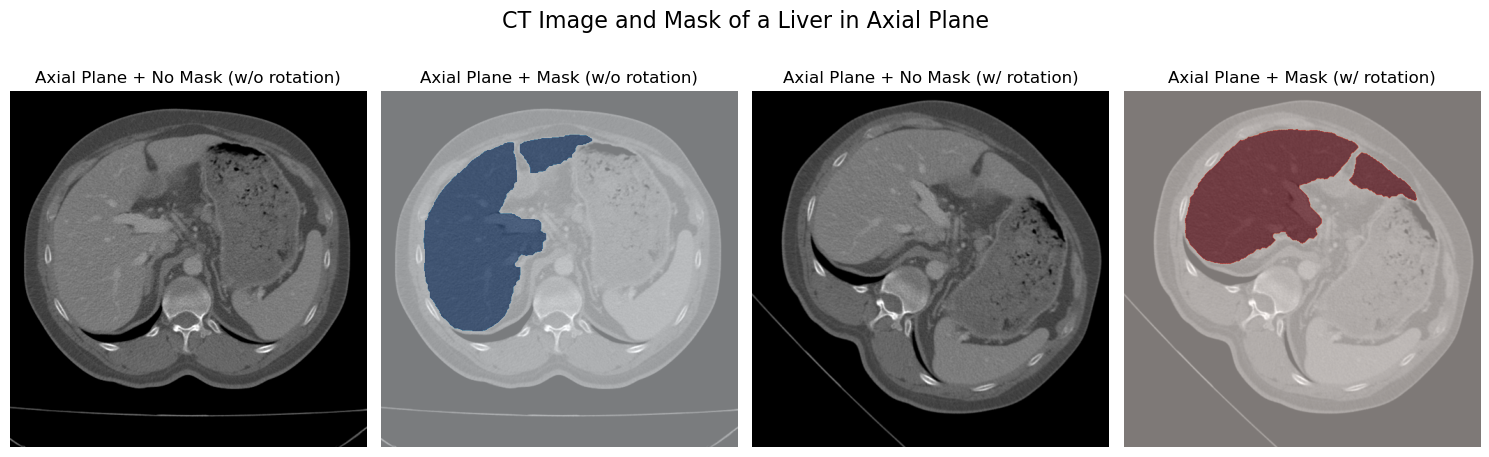

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from monai.transforms import Rotated

# Load the image and mask
image_path = '/home/roan/Documents/DL2/DL2-group5-med-seg/data/datasets/0000/1/image.npy'
mask_path = '/home/roan/Documents/DL2/DL2-group5-med-seg/data/datasets/0000/1/mask_(1, 512, 512, 96).npz'

image = np.load(image_path)
mask_data = np.load(mask_path)

# Check the shape of the loaded image and mask data
print("Image shape:", image.shape)
print("Mask data shape:", mask_data['shape'])

# Construct the sparse mask
mask = csr_matrix((mask_data['data'], mask_data['indices'], mask_data['indptr']), shape=(mask_data['shape'][0], mask_data['shape'][1])).toarray()

# Reshape the mask to its original 4D shape
mask = mask.reshape((1, 512, 512, 96))

# Check the shape of the mask after reshaping and squeezing
print("Mask shape after reshaping and squeezing:", mask.shape)

# Apply the rotation transformation with a single angle
transform = Rotated(keys=["image", "label"], angle=(0, 0, 0.78))
transformed = transform({"image": image, "label": mask})
rotated_image = transformed["image"]
rotated_mask = transformed["label"]

# Remove the first dimension which is 1
image = image.squeeze()
mask = mask.squeeze()
rotated_image = rotated_image.squeeze()
rotated_mask = rotated_mask.squeeze()

# Number of slices to display for each axis
slice_indices = {
    'axial': image.shape[2] // 2,
    'coronal': image.shape[1] // 2,
    'sagittal': image.shape[0] // 2
}

# Create subfigure with 3 rows and 4 columns
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

# Axial slice (XY plane)
axs[0].imshow(image[:, :, slice_indices['axial']], cmap='gray')
axs[0].set_title('Axial Plane + No Mask (w/o rotation)')
axs[0].axis('off')

axs[1].imshow(image[:, :, slice_indices['axial']], cmap='gray')
axs[1].imshow(mask[:, :, slice_indices['axial']], cmap='Blues', alpha=0.5)
axs[1].set_title('Axial Plane + Mask (w/o rotation)')
axs[1].axis('off')

axs[2].imshow(rotated_image[:, :, slice_indices['axial']], cmap='gray')
axs[2].set_title('Axial Plane + No Mask (w/ rotation)')
axs[2].axis('off')

axs[3].imshow(rotated_image[:, :, slice_indices['axial']], cmap='gray')
axs[3].imshow(rotated_mask[:, :, slice_indices['axial']], cmap='Reds', alpha=0.5)
axs[3].set_title('Axial Plane + Mask (w/ rotation)')
axs[3].axis('off')

plt.suptitle("CT Image and Mask of a Liver in Axial Plane", fontsize=16)
plt.tight_layout()
plt.savefig('../figures/ct_image_mask_example.png')
plt.show()

Image shape: (1, 512, 512, 96)
Mask data shape: [       1 25165824]
Mask shape after reshaping and squeezing: (1, 512, 512, 96)


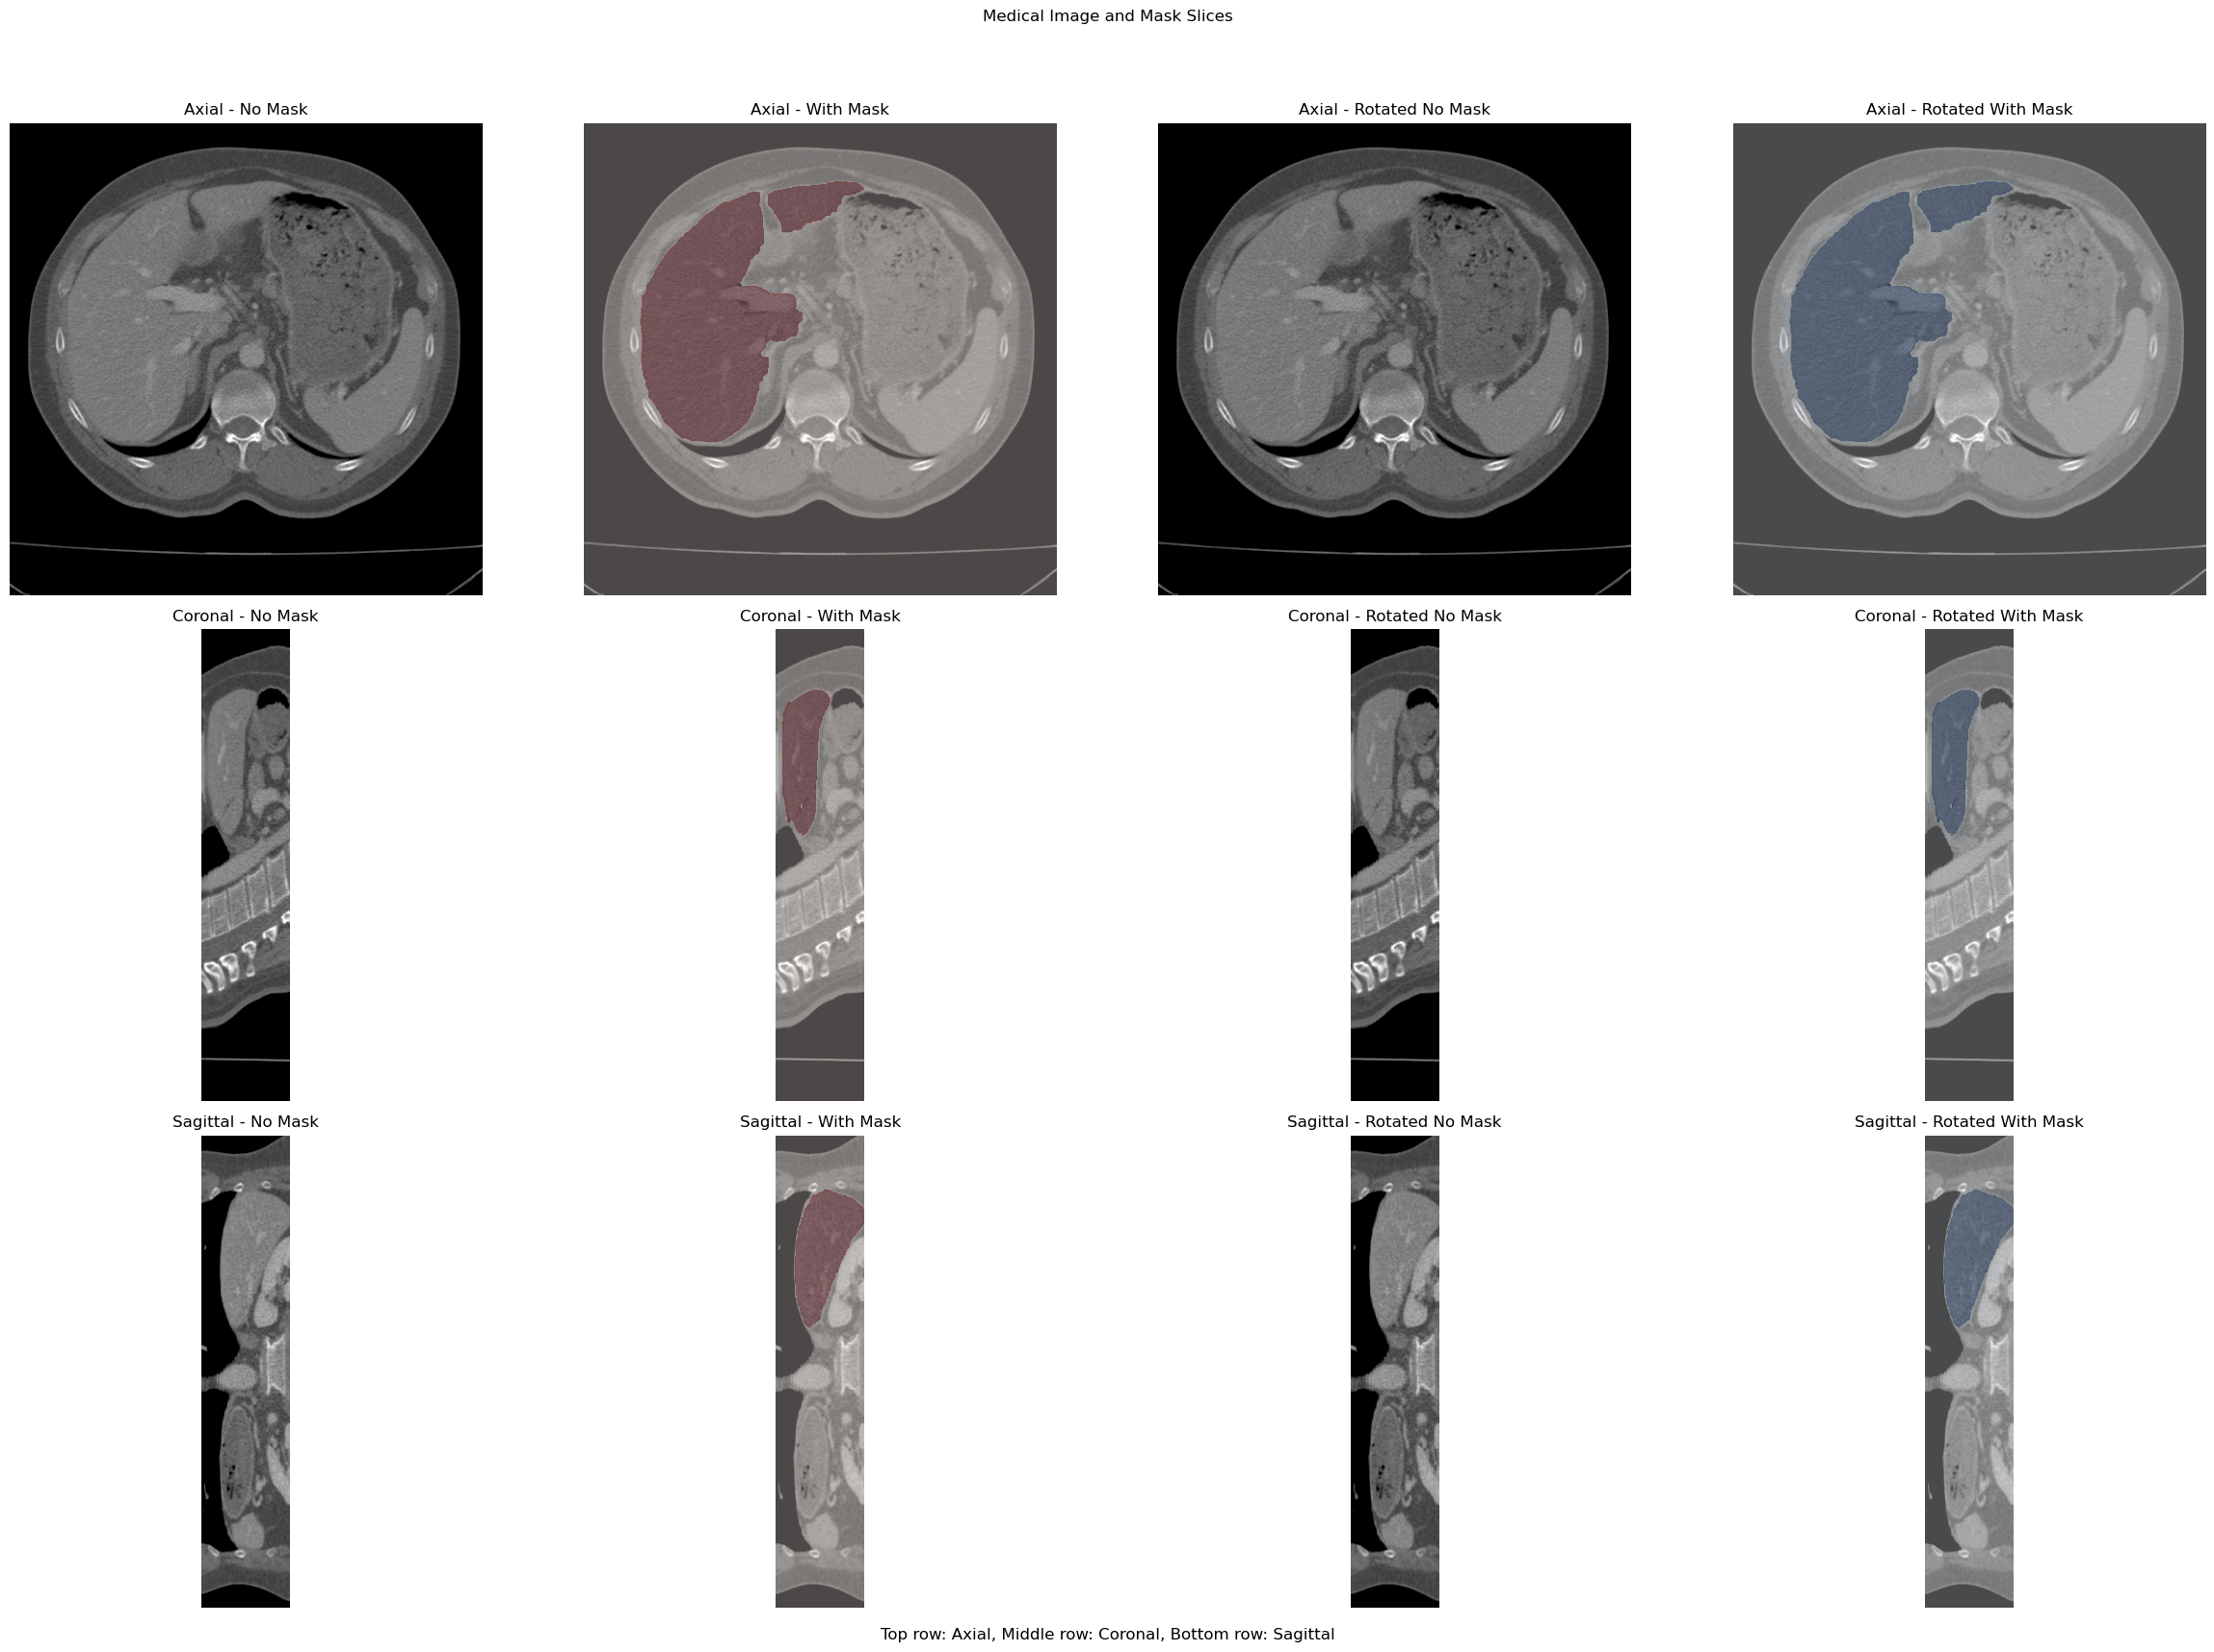

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from monai.transforms import Rotated

# Load the image and mask
image_path = '/home/roan/Documents/DL2/DL2-group5-med-seg/data/datasets/0000/1/image.npy'
mask_path = '/home/roan/Documents/DL2/DL2-group5-med-seg/data/datasets/0000/1/mask_(1, 512, 512, 96).npz'

image = np.load(image_path)
mask_data = np.load(mask_path)

# Check the shape of the loaded image and mask data
print("Image shape:", image.shape)
print("Mask data shape:", mask_data['shape'])

# Construct the sparse mask
mask = csr_matrix((mask_data['data'], mask_data['indices'], mask_data['indptr']), shape=(mask_data['shape'][0], mask_data['shape'][1])).toarray()

# Reshape the mask to its original 4D shape
mask = mask.reshape((1, 512, 512, 96))

# Check the shape of the mask after reshaping and squeezing
print("Mask shape after reshaping and squeezing:", mask.shape)

# Apply the rotation transformation with a single angle
transform = Rotated(keys=["image", "label"], angle=(0, 0, 0))
transformed = transform({"image": image, "label": mask})
rotated_image = transformed["image"]
rotated_mask = transformed["label"]

# Remove the first dimension which is 1
image = image.squeeze()
mask = mask.squeeze()
rotated_image = rotated_image.squeeze()
rotated_mask = rotated_mask.squeeze()

# Number of slices to display for each axis
slice_indices = {
    'axial': image.shape[2] // 2,
    'coronal': image.shape[1] // 2,
    'sagittal': image.shape[0] // 2
}

# Create subfigure with 3 rows and 4 columns
fig, axs = plt.subplots(3, 4, figsize=(24, 18))

# Axial slice (XY plane)
axs[0, 0].imshow(image[:, :, slice_indices['axial']], cmap='gray')
axs[0, 0].set_title('Axial - No Mask')
axs[0, 0].axis('off')

axs[0, 1].imshow(image[:, :, slice_indices['axial']], cmap='gray')
axs[0, 1].imshow(mask[:, :, slice_indices['axial']], cmap='Reds', alpha=0.3)
axs[0, 1].set_title('Axial - With Mask')
axs[0, 1].axis('off')

axs[0, 2].imshow(rotated_image[:, :, slice_indices['axial']], cmap='gray')
axs[0, 2].set_title('Axial - Rotated No Mask')
axs[0, 2].axis('off')

axs[0, 3].imshow(rotated_image[:, :, slice_indices['axial']], cmap='gray')
axs[0, 3].imshow(rotated_mask[:, :, slice_indices['axial']], cmap='Blues', alpha=0.3)
axs[0, 3].set_title('Axial - Rotated With Mask')
axs[0, 3].axis('off')

# Coronal slice (XZ plane)
axs[1, 0].imshow(image[:, slice_indices['coronal'], :], cmap='gray')
axs[1, 0].set_title('Coronal - No Mask')
axs[1, 0].axis('off')

axs[1, 1].imshow(image[:, slice_indices['coronal'], :], cmap='gray')
axs[1, 1].imshow(mask[:, slice_indices['coronal'], :], cmap='Reds', alpha=0.3)
axs[1, 1].set_title('Coronal - With Mask')
axs[1, 1].axis('off')

axs[1, 2].imshow(rotated_image[:, slice_indices['coronal'], :], cmap='gray')
axs[1, 2].set_title('Coronal - Rotated No Mask')
axs[1, 2].axis('off')

axs[1, 3].imshow(rotated_image[:, slice_indices['coronal'], :], cmap='gray')
axs[1, 3].imshow(rotated_mask[:, slice_indices['coronal']], cmap='Blues', alpha=0.3)
axs[1, 3].set_title('Coronal - Rotated With Mask')
axs[1, 3].axis('off')

# Sagittal slice (YZ plane)
axs[2, 0].imshow(image[slice_indices['sagittal'], :, :], cmap='gray')
axs[2, 0].set_title('Sagittal - No Mask')
axs[2, 0].axis('off')

axs[2, 1].imshow(image[slice_indices['sagittal'], :, :], cmap='gray')
axs[2, 1].imshow(mask[slice_indices['sagittal'], :, :], cmap='Reds', alpha=0.3)
axs[2, 1].set_title('Sagittal - With Mask')
axs[2, 1].axis('off')

axs[2, 2].imshow(rotated_image[slice_indices['sagittal'], :, :], cmap='gray')
axs[2, 2].set_title('Sagittal - Rotated No Mask')
axs[2, 2].axis('off')

axs[2, 3].imshow(rotated_image[slice_indices['sagittal'], :, :], cmap='gray')
axs[2, 3].imshow(rotated_mask[slice_indices['sagittal'], :, :], cmap='Blues', alpha=0.3)
axs[2, 3].set_title('Sagittal - Rotated With Mask')
axs[2, 3].axis('off')

plt.suptitle("Medical Image and Mask Slices")
plt.figtext(0.5, 0.04, "Top row: Axial, Middle row: Coronal, Bottom row: Sagittal", ha="center", fontsize=12)
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()